In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["axes.labelsize"] = 14

## HCP 100 Subjects CNN with 3 Pipelines

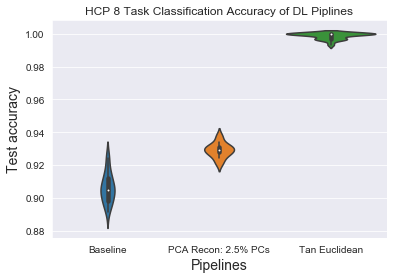

In [16]:
baseline = pd.read_csv('HCP100_base_E200_LR0.001_R1_S0_Y1_20.csv')
tan_euclidean = pd.read_csv('HCP100_Taneuclid_E200_LR0.001_R1_S0_Y1_20.csv')
pca_recon = pd.read_csv('HCP100_recon_0.025_E200_LR0.001_R0_S0_Y1.csv')
df = pd.concat([baseline['Accuracy'], pca_recon['Accuracy'],
                tan_euclidean['Accuracy']], axis=1,
               keys=['Baseline', 'PCA Recon: 2.5% PCs', 'Tan Euclidean'])
df = df.melt(var_name='Pipelines', value_name='Test accuracy')
ax = sns.violinplot(x="Pipelines", y="Test accuracy", data=df).set_title(
    'HCP 8 Task Classification Accuracy of DL Piplines')
fig = ax.get_figure()
plt.show()

## Task Classification on Closest FC without DL

In [17]:
distances = pd.read_csv('distances_task.csv', names=["Type", "Accuracy"])
new = distances["Type"].str.rsplit("_", n = 1, expand = True) 
distances['Tangent Reference'] = new[0]
distances['Distance'] = new[1]
distances.drop(columns =["Type"], inplace = True) 
distances.head()

,Accuracy,Tangent Reference,Distance
0,0.891447,euclid,corr
1,0.875000,euclid,cosine
2,0.128289,euclid,euclidean
3,0.871711,harmonic,corr
4,0.907895,harmonic,cosine


<Figure size 432x288 with 0 Axes>

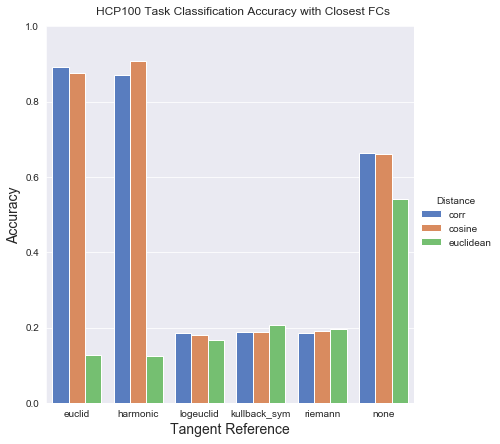

In [18]:
sns.set_style("darkgrid")
plt.tight_layout()
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Distance", data=distances,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.suptitle('HCP100 Task Classification Accuracy with Closest FC', y=1.02)
plt.savefig('distance_task.png', bbox_inches='tight')
plt.show()

## Subject Classification on Closest FC without DL

In [19]:
distances = pd.read_csv('distances_subject.csv', names=["Type", "Accuracy"])
new = distances["Type"].str.rsplit("_", n = 1, expand = True) 
distances['Tangent Reference'] = new[0]
distances['Distance'] = new[1]
distances.drop(columns =["Type"], inplace = True) 
distances.head()

,Accuracy,Tangent Reference,Distance
0,0.019737,euclid,corr
1,0.019737,euclid,cosine
2,0.019737,euclid,euclidean
3,0.003289,harmonic,corr
4,0.003289,harmonic,cosine


<Figure size 432x288 with 0 Axes>

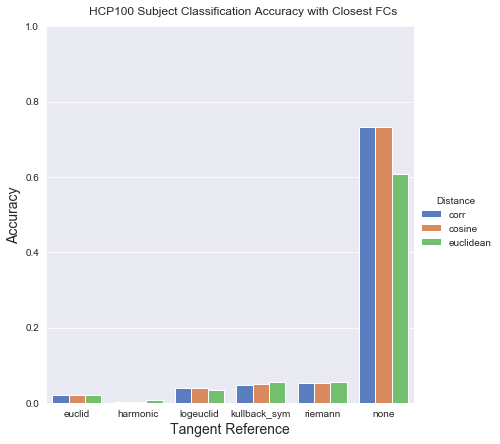

In [21]:
sns.set_style("darkgrid")
plt.tight_layout()
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Distance", data=distances,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.suptitle('HCP100 Subject Classification Accuracy with Closest FC', y=1.02)
plt.savefig('distance_subj.png', bbox_inches='tight')
plt.show()

### KNN Classification, k = 30

In [24]:
knn_distances = pd.read_csv('knn_distances_task.csv', names=["Type", "Accuracy"])
new = knn_distances["Type"].str.rsplit("_", n = 1, expand = True) 
knn_distances['Tangent Reference'] = new[0]
knn_distances['Distance'] = new[1]
knn_distances.drop(columns =["Type"], inplace = True) 
knn_distances.head()

,Accuracy,Tangent Reference,Distance
0,0.868421,euclid,correlation
1,0.848684,euclid,cosine
2,0.125000,euclid,euclidean
3,0.875000,harmonic,correlation
4,0.875000,harmonic,cosine


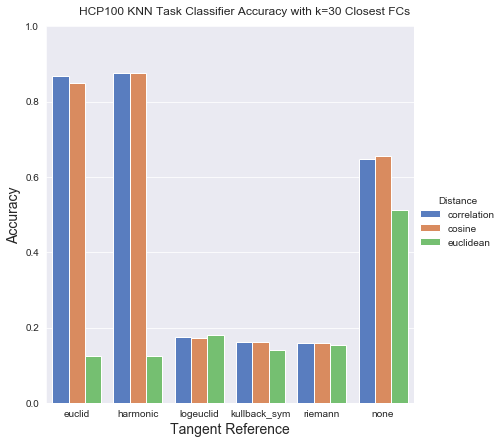

In [25]:
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Distance", data=knn_distances,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.suptitle('HCP100 KNN Task Classifier Accuracy with k=30 Closest FCs', y=1.02)
plt.savefig('knn_classification.png', bbox_inches='tight')
plt.show()

### Subject Classification - KNN 

In [26]:
knn_subject = pd.read_csv('knn_distances_subject.csv', names=["Type", "Accuracy"])
new = knn_subject["Type"].str.rsplit("_", n = 1, expand = True) 
knn_subject['Tangent Reference'] = new[0]
knn_subject['Distance'] = new[1]
knn_subject.drop(columns =["Type"], inplace = True) 
knn_subject.head()

,Accuracy,Tangent Reference,Distance
0,0.0,euclid,correlation
1,0.0,euclid,cosine
2,0.0,euclid,euclidean
3,0.0,harmonic,correlation
4,0.0,harmonic,cosine


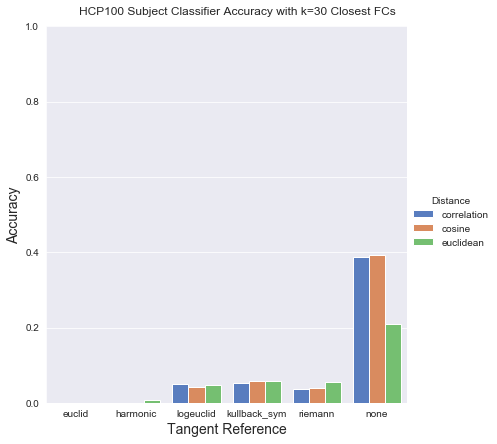

In [27]:
ref_plot = sns.catplot(x="Tangent Reference", y="Accuracy", hue="Distance", data=knn_subject,
                height=6, kind="bar", palette="muted").set(ylim=(0, 1))
ref_plot.fig.suptitle('HCP100 Subject Classifier Accuracy with k=30 Closest FCs', y=1.02)
plt.savefig('knn_subj.png', bbox_inches='tight')
plt.show()